# Lab Assignment # 1 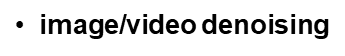

# Submission by:
## Saransh Gupta | 17QM30005

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import sys
import math
import random
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Type the number of Image (from 1 to 9)

In [2]:
# ii = int(input("Type the Number of Image:"))
ii = 1

In [3]:
try:
    image  = '{}.jpg'.format(ii)
    im = np.array(Image.open(image))
    original_im = np.array(Image.open(image))
    a = np.asarray(original_im)
    
except:
    pass

showing the original image

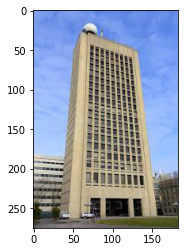

In [4]:
plt.imshow(original_im)
plt.show()

setting the random seed

In [5]:
random.seed(42)
print('The shape of Input image is: ')
print(a.shape)

The shape of Input image is: 
(275, 183, 3)


## Part 1: Corrupt the images : randomly choosing some pixels and replacing the pixel values with random/junk values.   [3 marks]

### choosing 500 pixels at random to be distorted

In [6]:
   
for i in range(500):
    j = random.randint(11,im.shape[0]-4)
    k = random.randint(0,im.shape[1]-1-5) 
    a[j][k][0] = 255 - a[j+3][k][0]
    a[j][k][1] = 255 - a[j][k+5][1]
    a[j][k][2] = 255 - a[j-10][k][2]


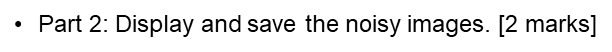

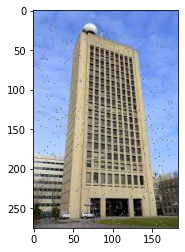

In [7]:
plt.imshow(a)
plt.show()

# Saving the distorted image as distorted_{index of image}.jpg

In [8]:
mpimg.imsave("distorted_{}.jpg".format(ii), a)


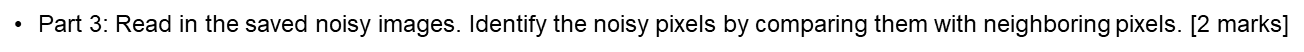


### Reading the noisy image

In [9]:
im1 = np.array(Image.open("distorted_{}.jpg".format(ii)))

# Splitting the RGB components of Image:
#### We use RGB components of the image separately to be fed into the mean and median filter

In [10]:
def splitRGB(im1):
    R = []
    G = []
    B = []
    for i in range(im1.shape[0]):
        R1 = []
        G1 = []
        B1 = []
        for j in range(im1.shape[1]):
            R1.append(im1[i][j][0]) #R component of Image
            G1.append(im1[i][j][1]) #G component of Image
            B1.append(im1[i][j][2]) #B component of Image

        R.append(R1)
        G.append(G1)
        B.append(B1)
    #converting the obtained R, G, B arrays into numpy arrays for optimizing the speed of array operations
    R = np.array(R)
    G = np.array(G)
    B = np.array(B)
    
    return R,G,B

R, G, B = splitRGB(im1)

## Estimating the level of noise in the image (higher the value of sigma, the higher will be the noise) 

###### please note that: this step just tells the intensity of noice in the image, it has nothing to do with the core assignment, but meant for the self understanding on how do we measure noise in an Image

In [11]:

def my_convolve2d(a, conv_filter):
    submatrices = np.array([
         [a[:-2,:-2], a[:-2,1:-1], a[:-2,2:]],
         [a[1:-1,:-2], a[1:-1,1:-1], a[1:-1,2:]],
         [a[2:,:-2], a[2:,1:-1], a[2:,2:]]])
    multiplied_subs = np.einsum('ij,ijkl->ijkl',conv_filter,submatrices)
    return np.sum(np.sum(multiplied_subs, axis = -3), axis = -3)

def estimate_noise(I):

  H, W = I.shape

  M = [[1, -2, 1],
       [-2, 4, -2],
       [1, -2, 1]]

  sigma = np.sum(np.sum(np.absolute(my_convolve2d(I, M))))
  sigma = sigma * math.sqrt(0.5 * math.pi) / (6 * (W-2) * (H-2))

  return sigma

print(' noice level in R:', estimate_noise(R), '\n noice level in G:',estimate_noise(G),'\n noice level in B:',estimate_noise(B) )

 noice level in R: 7.908656631421239 
 noice level in G: 7.90613713511514 
 noice level in B: 7.672090301243916


# Part 3 and Part 4 (combined): 

### Replace the "noisy pixels" identified in part 3 with mean and median of the neighboring pixels. Display the "denoised" images. [3 marks]

# Mean Filtering

## Here we identify the noisy pixel and replace by the mean of the window

In [12]:
def meanFilter(im): # this function takes R, G , B values separately to perform the operations
    img = im
    noisy_pixels_mean = [] # a list to save the noisy pixels
    w = 2 #building a 2 x 2 window which will act as neighbours for any pixel
    thresh = 3 # threshold to identify the anomality in the pixels
    for i in range(2,im.shape[0]-2):
        for j in range(2,im.shape[1]-2):
            block = im[i-w:i+w+1, j-w:j+w+1]
            flag = 0
            for k in block: #iterating through the window to check which point is noisy 
                s = np.mean(k)
                for z in k:
                    if abs(s-z)>thresh: #if max of pixel in the window - current pixels exceeds the threshold then it should be a noisy point
                        noisy_pixels_mean.append(z)
                        m = np.mean(block) #replacing the noisy datapoint with mean 
                        flag = 1
                        img[i][j] = m
                        break
                if flag:
                    break
#     print('printing the noisy pixels\n\n')
#     print(noisy_pixels_mean)
    
    return img
transformed_im_mean_filter = np.dstack((meanFilter(splitRGB(im1)[0]),meanFilter(splitRGB(im1)[1]),meanFilter(splitRGB(im1)[2])))

# Median Filtering

## Here we identify the noisy pixel and replace by the median of the window

In [13]:
def medianFilter(im): # this function takes R, G , B values separately to perform the operations
    img = im
    noisy_pixels_median = [] # a list to save the noisy pixels
    w = 2 #building a 2 x 2 window which will act as neighbours for any pixel
    thresh = 3 # threshold to identify the anomality in the pixels
    for i in range(2,im.shape[0]-2):
        for j in range(2,im.shape[1]-2):
            block = im[i-w:i+w+1, j-w:j+w+1]
            flag = 0
            for k in block: #iterating through the window to check which point is noisy 
                s = np.median(k)
                for z in k:
                    if abs(s-z)>thresh: #if max of pixel in the window - current pixels exceeds the threshold then it should be a noisy point
                        noisy_pixels_median.append(z)
                        m = np.median(block) #replacing the noisy datapoint with median 
                        img[i][j] = m
                        flag = 1
                        break
                if flag:
                    break
                    
#     print('printing the noisy pixels\n\n')
#     print(noisy_pixels_median)              
    return img

transformed_im_median_filter = np.dstack((medianFilter(splitRGB(im1)[0]),meanFilter(splitRGB(im1)[1]),meanFilter(splitRGB(im1)[2])))

## Image produced with mean filtering

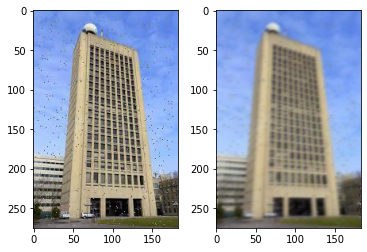

In [14]:
plt.title('d')
plt.subplot(121), plt.imshow(im1) 
plt.subplot(122) , plt.imshow(transformed_im_mean_filter)
plt.show()

## Image produced with Median filtering

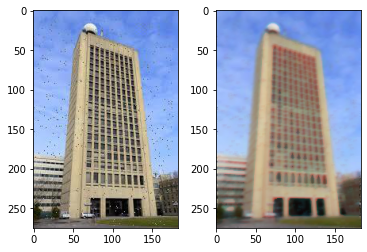

In [15]:
plt.subplot(121), plt.imshow(im1) 
plt.subplot(122) ,plt.imshow(transformed_im_median_filter)
plt.show()